In [15]:
import pandas as pd
import itertools
import re
import numpy as np

In [16]:
dataset = pd.read_csv('wdbc.data', header=None)

In [17]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset.describe()

In [18]:
# Drop the first column (ID column) in-place
dataset.drop(0, axis=1, inplace=True)

In [19]:
# Display the first 5 rows after dropping the ID column
print(dataset.head(5))

  1      2      3       4       5        6        7       8        9       10  \
0  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

   ...     22     23      24      25      26      27      28      29      30  \
0  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654  0.4601   
1  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860  0.2750   
2  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430  0.3613   
3  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575  0.6638   
4  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625  0.2364   

        31  
0  0.11890  
1  0.0

In [12]:
# Display the first 5 rows after dropping the ID column
print(dataset_clean.head(5))

  1      2      3       4       5        6        7       8        9       10  \
0  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

   ...     22     23      24      25      26      27      28      29      30  \
0  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654  0.4601   
1  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860  0.2750   
2  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430  0.3613   
3  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575  0.6638   
4  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625  0.2364   

        31  
0  0.11890  
1  0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import missingno

# Load the dataset
dataset = pd.read_csv('wdbc.data', header=None)

# Display the first 5 rows of the dataset
print(dataset.head(5))

# Define column names based on your mapping
column_mapping = {0: 'ID', 1: 'NucleiBar', 2: 'Mitosis', 3: '...', 30: 'Label'}
dataset.rename(columns=column_mapping, inplace=True)

# Clean the dataset
# Drop the first column (ID column)
dataset.drop('ID', axis=1, inplace=True)

# Replace -9.0 with NaN
dataset.replace(-9.0, np.nan, inplace=True)

# Fill NaN values in 'NucleiBar' with the median
medianNucleiBar = dataset['NucleiBar'].astype(float).median()
dataset['NucleiBar'].fillna(medianNucleiBar, inplace=True)

# Drop duplicates
dataset_clean = dataset.drop_duplicates()

# Drop the 'Mitosis' column
dataset_clean.drop('Mitosis', axis=1, inplace=True)

# Select features
dataset_selected = dataset_clean.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

# Visualize correlation
cor_mat = dataset_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

# Visualize Boxplot
dataset_clean.plot(kind='box', subplots=True, layout=(5, 6), sharex=False, figsize=(20, 20),
                   title='Figure 1: Data distributions of all features')
plt.show()

# Visualize the presence of missing values
missingdata_df = dataset_clean.columns[dataset_clean.isnull().any()].tolist()
missingno.matrix(dataset_clean[missingdata_df])

# Split the data into training and testing sets
X_norm = dataset_clean.drop("Label", axis=1).values
y = dataset_clean['Label']
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

# Model evaluation function
def evaluation(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    ps = precision_score(Y_test, Y_pred, average='weighted')

    metric_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }

    return print(metric_dict)


IndexError: index 2 is out of bounds for axis 0 with size 0

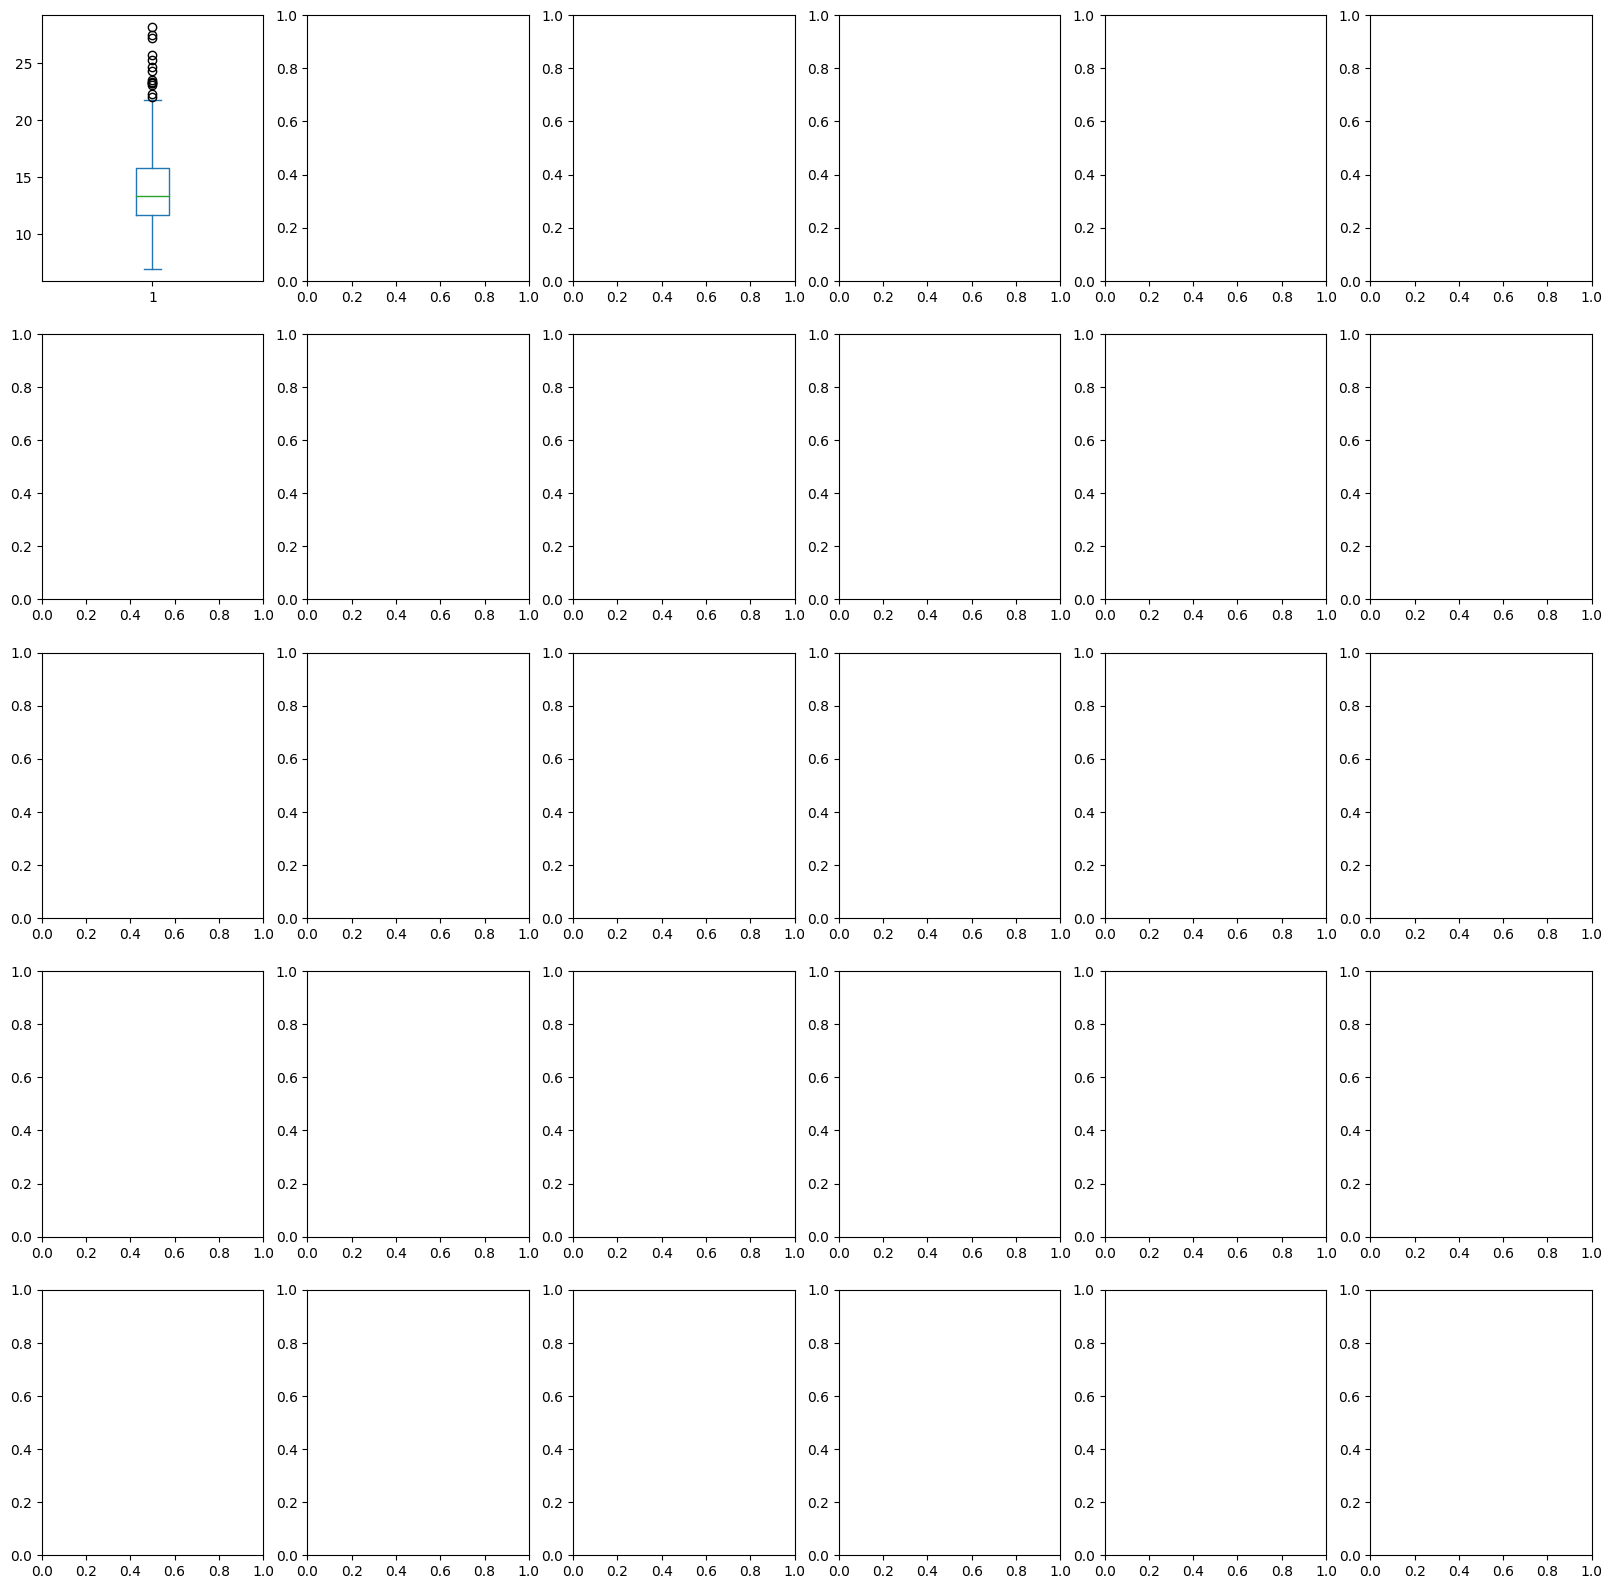

In [13]:
# Visualize boxplots to check for outliers
dataset_clean.plot(kind='box', subplots=True, layout=(5, 6), sharex=False, figsize=(20, 20),
                   title='Figure 1: Data distributions of all features')
plt.show()

In [14]:
# Visualize the presence of missing values
missingdata_df = dataset_clean.columns[dataset_clean.isnull().any()].tolist()
missingno.matrix(dataset_clean[missingdata_df])
plt.show()

NameError: name 'missingno' is not defined

In [ ]:
# Detect the presence of missing values
columns_with_missing_values = dataset_clean.loc[:, dataset_clean.isnull().any()].columns
print(columns_with_missing_values)

In [ ]:
# Assuming 'Class' is the target variable and 'Class' is categorical (if not, adjust accordingly)
X_norm = dataset_clean.drop(1, axis=1).values  # Assuming 'Class' is in the first column (index 1)
y = dataset_clean[1]

In [ ]:
# Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [ ]:
# Evaluation function
def evaluation(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    ps = precision_score(Y_test, Y_pred, average='weighted')

    metric_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }

    return metric_dict

In [ ]:
#model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Assuming dataset_clean is your preprocessed and cleaned dataset

# Split the data into training and testing sets
X = dataset_clean.drop("Label", axis=1).values
y = dataset_clean['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_model = tree.DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Model Evaluation:")
evaluation(y_test, y_pred_dt)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Model Evaluation:")
evaluation(y_test, y_pred_knn)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Model Evaluation:")
evaluation(y_test, y_pred_nb)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation:")
evaluation(y_test, y_pred_rf)
